# Model Creation and Scoring

## Introduction

### Summary
This project aimes to recognize the topics Small Business Owners and Startup owners discuss about on Reddit, their similarities, and differences. The results are targeted towards a Financial Institution, that is starting a new blog to attract companies at small size. This research investigates in what these two gruops differ for interest, and whether it might make sense to address them together or separately.


### In this Notebook
In this notebook I perform I fit and tune different categorical predictive models.

#### Models
First, I run a **Baseline Model** that predicts the majority class and results in a 62% Accuracy.

The I set a series of pipelines to run the following models using Count Vectorizer:

- **Random Forest** Manual
- **Random Forest** Grid Searched
- **Logistic Regression**
- **Multinomial Naive Bayes** 

Then I try using TF-TDIF and run a
- **Multinomial Naive Bayes** 


I choose Cvec over TFDIF to start with because in my data cleaning I removed all small size words and I want to take maxiumum advantage of "specific language" that might differenciate Startup and Small Business conversations.


#### Scores
Below a table summarizing the results from my models. Even thought the average scores for these models seem very similar, there is somewhat of a variation among them for different metrics and different classes.


|Model |precision | recall | f1|
| --- | --- | --- | --- |
|Baseline | 39% | 62% | 48% |
|Manual Random Forest| 85% | 85% | 85% |
|GridSearched Random Forest | 84% | 85% | 84%|
|Logistic Regression | 82% | 82% | 82% |
|MNBayes Count Vectorizer| 82% | 82% | 82%|
|MNBayes TF-IDF Vectorizer | 84% | 84% | 83 %|

These results show that the data is solid and the results consistent across different models.

### Conclusion

The best model ends up being a Random Forest, having the more class balanced results.

Although a lot can be done in improving the performance of the model.

First of all pulling more data, then investigating further differences in engagement and feature weights.

Overall, though, this analysis proves that the overlap between startup founders and business owners conversations is significant, but the conversations are also described by different keywords. This is the reason why I would advice the Financial Institution that wants to start the blog, to address the two market subsects with different terminology for the greates part, and verify through the model if the keywords for the articles they look forward to cover in the online publication are predicted for the target they indend to address it towards.


### Notebook Index

- [01 | Data Collection](01_data_collection.ipynb)
- [02 | EDA & Cleaning](02_eda.ipynb)
- [03 | Model](03_model.ipynb)
- [04 | Sentiment Analysis](04_sentiment_analysis.ipynb)

In [89]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_auc_score, plot_roc_curve
from sklearn import metrics

In [90]:
def custom_pallete(custom_colors):
    customPalette = sns.set_palette(sns.color_palette(custom_colors))
    sns.palplot(sns.color_palette(custom_colors),size=0.8)
    plt.tick_params(axis='both', labelsize=0, length = 0)

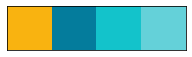

In [104]:
acqua = ["#84B099","#973276","#CA8D89", "#E4F3E0","#B5DEC8","#9CC7B0","#84B099","#CFB384","#F7BF7D","#CA8D89","#8959B9","#973276"]
contrast =["#E26D5C","#FFCD70", "#38618C", '#723D46', '#472D30']
project_3 = ["#F9B310","#047C9C","#13C3CB", "#64D1D9"]
custom_pallete(project_3)

In [2]:
df = pd.read_csv('../data/corpus_clean.csv')

In [3]:
df.isnull().sum()

title           0
created_utc     0
author          0
num_comments    0
score           0
is_self         0
alltext         2
target          0
dtype: int64

In [4]:
df.dropna(subset=['alltext'], inplace=True)

Bring the custom stopwords from the last to this notebook.

In [5]:
text.ENGLISH_STOP_WORDS

add_stop_words = ['don', 'x200b']

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

## Define X, y and Train Test Split 

In [106]:
X = df[['alltext']]
y = df['target']

In [7]:
y.value_counts(normalize = True)

0    0.620776
1    0.379224
Name: target, dtype: float64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=42)

In [9]:
y_test.value_counts(normalize = True)

0    0.620724
1    0.379276
Name: target, dtype: float64

## 0. Baseline Model

In [37]:
baseline = DummyClassifier(strategy="most_frequent")
baseline.fit(X_train, y_train)
preds_baseline = baseline.predict(X_test)

#Score & store scores
baseline_train = baseline.score(X_train, y_train)
baseline_test = baseline.score(X_test, y_test)
print('Train score:', baseline_train)
print('Test score:', baseline_test)

Train score: 0.6207937395192845
Test score: 0.6207243460764588


## 1. Random Forest and Count Vectorizer 
### a. Manual

In [10]:
#Initiate Count Vectorizer
cvec = CountVectorizer(analyzer = "word", 
                       tokenizer = None, 
                       preprocessor = None,
                       stop_words = None, 
                       max_features = 10000, 
                       ngram_range = (1, 3)
                      )
#Initiate Random Forest
rf = RandomForestClassifier(random_state = 42)

#Initiate Pipeline
pipe = Pipeline([
    ('cvec', cvec),
    ('rf', rf)
])

#Fit pipe
pipe.fit(X_train, y_train)

#Score & store scores
rf_man_train = pipe.score(X_train, y_train)
rf_man_test = pipe.score(X_test, y_test)
print('Train score:', rf_man_train)
print('Test score:', rf_man_test)

Train score: 0.9976523197316937
Test score: 0.8484238765928906


In [11]:
#Get predictions
preds_rf_man = pipe.predict(X_test)

#Save confusion matrix values
tn_rf_man, fp_rf_man, fn_rf_man, tp_rf_man = confusion_matrix(y_test, preds_rf_man).ravel()

#Calculate the specificity
spec_rf_man = tn_rf_man / (tn_rf_man + fp_rf_man)

print('Specificity:', spec_rf_man)

Specificity: 0.9259859535386278


0.899947264866507

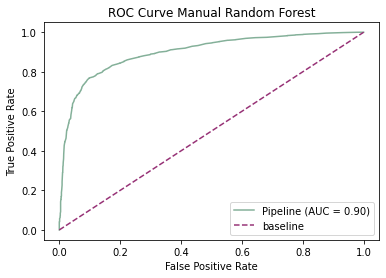

In [99]:
# ROC curve
plot_roc_curve(pipe, X_test, y_test)
# add worst case scenario line
plt.plot([0,1], [0,1], label = 'baseline', linestyle = '--')
# add a legend
plt.legend()
plt.title('ROC Curve Manual Random Forest');
# Calculate ROC AUC.
roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1])

### b. Gridsearch

In [14]:
params_rf = {
    'cvec__stop_words': [None, 'english', stop_words], 
    'cvec__max_features': [500, 1000, 5000], 
    'cvec__ngram_range': [(1, 1), (1, 2)], 
    'rf__n_estimators': [10, 20, 30],
    'rf__max_depth': [None, 10, 20]
}

gs_rf = GridSearchCV(pipe, param_grid=params_rf, cv=3, verbose=1, n_jobs=-2)
gs_rf.fit(X_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-2)]: Done 420 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-2)]: Done 486 out of 486 | elapsed:  2.4min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(max_features=10000,
                                                        ngram_range=(1, 3))),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-2,
             param_grid={'cvec__max_features': [500, 1000, 5000],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None, 'english',
                                              frozenset({'a', 'about', 'above',
                                                         'across', 'after',
                                                         'afterwards', 'again',
                                                         'against', 'all',
                                                         'almost', 'alone',
                                             

In [15]:
gs_rf_train = gs_rf.score(X_train, y_train)
gs_rf_test = gs_rf.score(X_test, y_test)
gs_rf_params = gs_rf.best_params_

print('Best score:', gs_rf.best_score_)
print('Best Parameters:', gs_rf_params)
print('Train Score:', gs_rf_train)
print('Test Score:', gs_rf_test)

Best score: 0.8404692195815318
Best Parameters: {'cvec__max_features': 1000, 'cvec__ngram_range': (1, 2), 'cvec__stop_words': 'english', 'rf__max_depth': None, 'rf__n_estimators': 30}
Train Score: 0.9951928451648966
Test Score: 0.8450704225352113


In [16]:
#Get predictions
preds_rf = gs_rf.predict(X_test)

#Save confusion matrix values
tn_rf, fp_rf, fn_rf, tp_rf = confusion_matrix(y_test, preds_rf).ravel()

#Calculate the specificity
spec_rf = tn_rf / (tn_rf + fp_rf)

print('Specificity:', spec_rf)

Specificity: 0.9070772555375473


0.8905196655713618

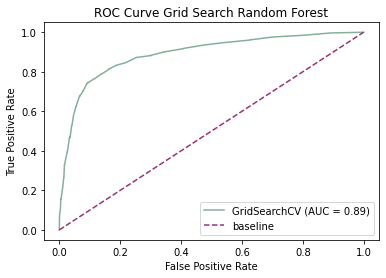

In [100]:
# ROC curve
plot_roc_curve(gs_rf, X_test, y_test)
# add worst case scenario line
plt.plot([0,1], [0,1], label = 'baseline', linestyle = '--')
# add a legend
plt.legend()
plt.title('ROC Curve Grid Search Random Forest');
# Calculate ROC AUC.
roc_auc_score(y_test, gs_rf.predict_proba(X_test)[:,1])

## 2. Logistic Regression Count Vectorizer

In [48]:
#Initiate LCount Vectorizer
cvec = CountVectorizer(analyzer = "word", 
                       tokenizer = None, 
                       preprocessor = None,
                       stop_words = stop_words, 
                       max_features = 10000, 
                       ngram_range = (1, 3)
                      )
#Initiate Logistic Regression
logreg = LogisticRegression(solver = 'liblinear')

#Initialize Pipeline
pipe_log = Pipeline([
    ('cvec', cvec),
    ('logreg', logreg)
])
#Fit the pipeline
pipe_log.fit(X_train, y_train)

Pipeline(steps=[('cvec',
                 CountVectorizer(max_features=10000, ngram_range=(1, 3),
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                       'another', 'any',
                                                       'anyhow', '

In [49]:
# Score model on training and test set.
pipe_log.score(X_train, y_train), pipe_log.score(X_test, y_test)

(0.98848518725545, 0.824279007377599)

In [65]:
# Get predictions
preds_log = pipe_log.predict(X_test)

# # Save confusion matrix values
tn_log, fp_log, fn_log, tp_log = confusion_matrix(y_test, preds_log).ravel()

# # Calculate the specificity

spec_log = tn_log / (tn_log + fp_log)

print('Specificity:', spec_log)

Specificity: 0.8789843327930849


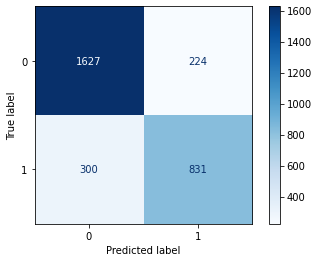

In [66]:
plot_confusion_matrix(pipe_log, X_test, y_test, cmap='Blues', values_format='d');

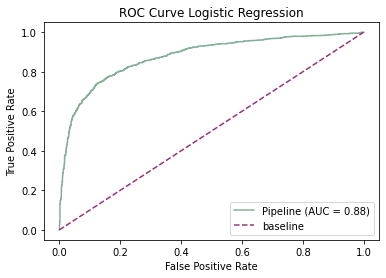

In [103]:
# ROC curve
plot_roc_curve(pipe_log, X_test, y_test)
# add worst case scenario line
plt.plot([0,1], [0,1], label = 'baseline', linestyle = '--')
# add a legend
plt.legend()
plt.title("ROC Curve Logistic Regression");

In [68]:
# Calculate ROC AUC.
roc_auc_score(y_test, pipe_log.predict_proba(X_test)[:,1])

0.8778164215486074

## 3. Multinomial Naive Bayes model¶
### a. CountVectorizer

Search over the following values of hyperparameters:
- Maximum number of features fit: 1000, 2000, 3000, 5000
- Minimum number of posts to include token: 2, 3
- Maximum number of posts to include token: 90%, 95%
- Choose between individual tokens and individual tokens and 2-grams.

In [17]:
pipe_cvnb = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

params_cvnb = {
    'cvec__max_features': [1000, 2000, 3000, 5000],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)]
}

gs_cvnb = GridSearchCV(pipe_cvnb, params_cvnb, cv=5,n_jobs= -2)

# Fit GridSearch to training data.
gs_cvnb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=-2,
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [1000, 2000, 3000, 5000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)]})

In [18]:
#Store the scores in valriables for further use
gs_cvnb_best = gs_cvnb.best_score_
gs_cvnb_train = gs_cvnb.score(X_train, y_train)
gs_cvnb_test = gs_cvnb.score(X_test, y_test)

#Print scores
print('Best score:', gs_rf.best_score_)
print('Best Parameters:', gs_rf_params)
print('Train Score:', gs_rf_train)
print('Test Score:', gs_rf_test)

Best score: 0.8404692195815318
Best Parameters: {'cvec__max_features': 1000, 'cvec__ngram_range': (1, 2), 'cvec__stop_words': 'english', 'rf__max_depth': None, 'rf__n_estimators': 30}
Train Score: 0.9951928451648966
Test Score: 0.8450704225352113


Specificity: 0.8454889249054565


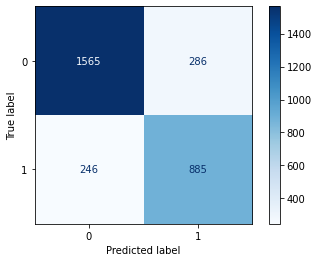

In [93]:
# Get predictions
preds_cvnb = gs_cvnb.predict(X_test)

# Save confusion matrix values
tn_cvnb, fp_cvnb, fn_cvnb, tp_cvnb = confusion_matrix(y_test, preds_cvnb).ravel()

#Plot the confusion matrix
plot_confusion_matrix(gs_cvnb, X_test, y_test, cmap='Blues', values_format='d');

#Calculate the specificity
spec_cvnb = tn_cvnb / (tn_cvnb + fp_cvnb)

print('Specificity:', spec_cvnb)

0.8800829814075217

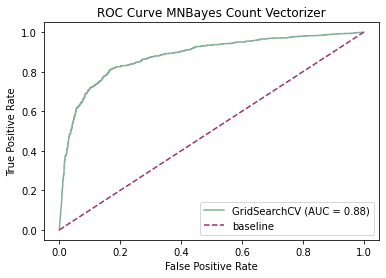

In [101]:
# ROC curve
plot_roc_curve(gs_cvnb, X_test, y_test)
# add worst case scenario line
plt.plot([0,1], [0,1], label = 'baseline', linestyle = '--')
# add a legend
plt.title("ROC Curve MNBayes Count Vectorizer")
plt.legend();

# Calculate ROC AUC.
roc_auc_score(y_test, gs_cvnb.predict_proba(X_test)[:,1])

### b. TF-IDF Vectorizer

Search over the following values of hyperparameters:
- Maximum number of features fit: 1000, 2000, 3000, 5000
- Choose between no stop words, english and (my custom) stop_words
- Choose individual tokens or individual tokens and 2-grams.

In [20]:
# Instantiate the transformer.
tvec = TfidfVectorizer()

In [21]:
# convert training data to dataframe
X_train_df = pd.DataFrame(tvec.fit_transform(X_train).todense(), 
                          columns=tvec.get_feature_names())

In [22]:
pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

params_tvec = {
    'tvec__max_features': [1000, 2000, 3000, 5000],
    'tvec__stop_words': [None, 'english', stop_words],
    'tvec__ngram_range': [(1,1), (1,2)]
}

# Instantiate GridSearchCV.
gs_tvec = GridSearchCV(pipe_tvec, params_tvec, cv=5, n_jobs=-2)

# Fit GridSearch to training data.
gs_tvec.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=-2,
             param_grid={'tvec__max_features': [1000, 2000, 3000, 5000],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english',
                                              frozenset({'a', 'about', 'above',
                                                         'across', 'after',
                                                         'afterwards', 'again',
                                                         'against', 'all',
                                                         'almost', 'alone',
                                                         'along', 'already',
                                                         'also', 'although',
                                                         'always', 'am',
         

In [23]:
# Score model on training and test set.
gs_tvec.score(X_train, y_train), gs_tvec.score(X_test, y_test)

(0.8527669088876467, 0.835345405767941)

In [54]:
# # Get predictions
preds_tvec = gs_tvec.predict(X_test)

# # Save confusion matrix values
tn_tvec, fp_tvec, fn_tvec, tp_tvec = confusion_matrix(y_test, preds_tvec).ravel()

# # Calculate the specificity

spec_tvec = tn_tvec / (tn_tvec + fp_tvec)

print('Specificity:', spec_tvec)

Specificity: 0.9146407347379795


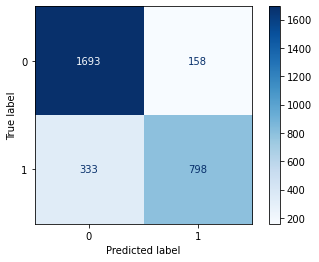

In [25]:
plot_confusion_matrix(gs_tvec, X_test, y_test, cmap='Blues', values_format='d');

0.9031061184696686

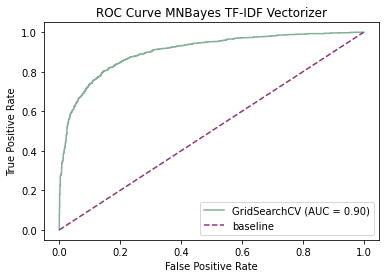

In [102]:
# ROC curve
plot_roc_curve(gs_tvec, X_test, y_test)
# add worst case scenario line
plt.plot([0,1], [0,1], label = 'baseline', linestyle = '--')
# add a legend
plt.legend()
plt.title("ROC Curve MNBayes TF-IDF Vectorizer");

# Calculate ROC AUC.
roc_auc_score(y_test, gs_tvec.predict_proba(X_test)[:,1])

## Models Valuation

In this section all the results obtained by the models above are compared.

In [60]:
print ("Baseline Model")
print(metrics.classification_report(y_test, preds_baseline))
print ("____________________________________________________")
print ("Manual Random Forest")
print(metrics.classification_report(y_test, preds_rf_man))
print ("____________________________________________________")
print ("Grid Searched Random Forest")
print(metrics.classification_report(y_test, preds_rf))
print ("____________________________________________________")
print ("Count Vectorizer MNBayes")
print(metrics.classification_report(y_test, preds_cvnb))
print ("____________________________________________________")
print ("TF-IDF Vectorizer MNBayes")
print(metrics.classification_report(y_test, preds_tvec))
print ("____________________________________________________")
print ("Logistic Regression")
print(metrics.classification_report(y_test, preds_log))

Baseline Model
              precision    recall  f1-score   support

           0       0.62      1.00      0.77      1851
           1       0.00      0.00      0.00      1131

    accuracy                           0.62      2982
   macro avg       0.31      0.50      0.38      2982
weighted avg       0.39      0.62      0.48      2982

____________________________________________________
Manual Random Forest
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1851
           1       0.86      0.72      0.78      1131

    accuracy                           0.85      2982
   macro avg       0.85      0.82      0.83      2982
weighted avg       0.85      0.85      0.85      2982

____________________________________________________
Grid Searched Random Forest
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1851
           1       0.83      0.74      0.78      1131

    accuracy

The Manual Random Forest is overall the model that had the best performances, even though all models appear to be overfit. I would probably need to rebalance the classes to make sure this is properly addressed in future models.

## Features Importance

I also wanted to investigate which words were influencing more the best model, Radom Forest.

To do so, I create a dataframe including best features and their importance scores.

I then plot it.

In [84]:
rf_features = cvec.get_feature_names()
rf_features_best = rf.feature_importances_

df_rf_features = pd.DataFrame(data=rf_features_best, index=rf_features)

df_rf_features.columns = ['feature_importances_']

In [85]:
df_rf_features.sort_values(by='feature_importances_', ascending=False).head(20)

,feature_importances_
restaurant owner,0.048811
card,0.024123
food drink,0.015625
really really,0.010779
really looking,0.010652
make easy,0.007978
time getting,0.007929
beverage,0.007674
input,0.007275
finally got,0.005852


Reastaurant owner stands out to be the most important feature, and it is clearly referable to Small Business. 

Further analysis could be done to interpret these coefficents in relationship to the class they are predicting. Unfortunately I did not have enough time (yet) to make this a more accurate analysis.